# **Comprehensive Sales Analysis**:
Understanding business performance and customers preferences across segments, regions, and product categories in order to increase company sales.

### **Problem Statement**:  
The company seeks to **identify key revenue drivers and optimize sales performance** across different customer segments, geographic regions, and product categories. While the Consumer segment and Technology category lead in sales, other areas such as the Home Office segment, certain regions, and low-performing product sub-categories show potential for improvement. This analysis aims to uncover sales trends, highlight growth opportunities, and provide data-driven insights to enhance revenue generation, improve regional penetration, and optimize product offerings.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv.zip")

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
if df.duplicated().sum() > 0:
    print("There are duplicates")
else:
    print("There are no duplicates")

There are no duplicates


## Customer Segmentation

In [ ]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
number_of_customers = df["Segment"].value_counts().reset_index().rename(columns={"Segment": "Type of Customer"})
number_of_customers

,Type of Customer,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


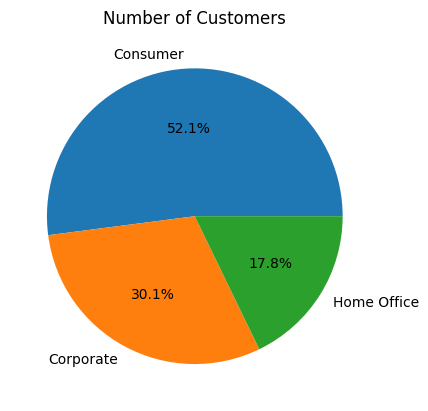

In [ ]:
plt.pie(number_of_customers["count"], labels=number_of_customers["Type of Customer"], autopct="%1.1f%%")
plt.title("Number of Customers")
plt.show()

### **Interpretation & Profitability Insights**  

While consumers represent the majority of customers, focusing solely on them overlooks the significant potential of the other two segments.

1. **Majority of Customers are Consumers**  
   - More than half of the customers fall into the Consumer segment, meaning that this group is crucial for driving sales.  
   - If Consumer sales volume is high but profit margins are low, consider upselling higher-margin products.  

2. **Corporate Segment is Significant**  
   - Corporate customers make up 30.1% of the customer base.  
   - They may purchase in bulk, so targeting them with discounts on large orders or B2B loyalty programs could be beneficial.  

3. **Home Office is the Smallest Segment**  
   - Home Office customers account for only 17.8%.  
   - Understanding why this segment is smaller could reveal opportunities for targeted marketing strategies.  

### **Next Steps for Deeper Insights**  
- Analyze sales **revenue** per segment to see which segment contributes most to profits.  
- Examine segment-based **product preferences** to identify top-performing products.  
- Look at **geographical trends** to see if certain regions favor specific customer segments.  

### Which segments generate more revenue?

In [ ]:
sales_per_segment = df.groupby("Segment")["Sales"] \
                    .sum() \
                    .reset_index() \
                    .rename(columns={"Segment": "Type of Customer", "Sales": "Total Sales"})
sales_per_segment

,Type of Customer,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


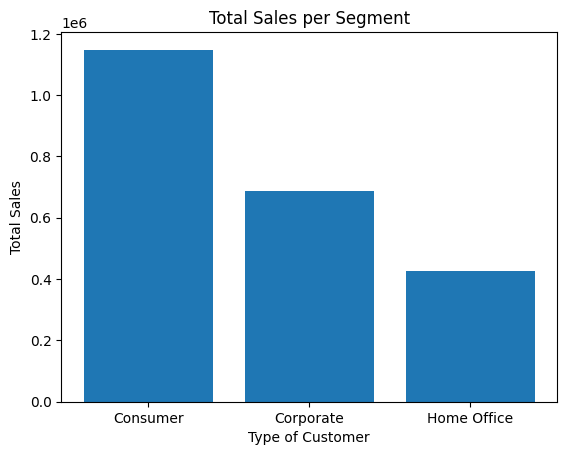

In [ ]:
plt.bar(sales_per_segment["Type of Customer"], sales_per_segment["Total Sales"])
plt.xlabel("Type of Customer")
plt.ylabel("Total Sales")
plt.title("Total Sales per Segment")
plt.show()

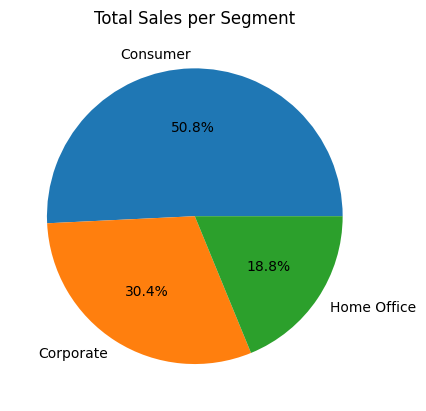

In [ ]:
plt.pie(sales_per_segment["Total Sales"], labels=sales_per_segment["Type of Customer"], autopct="%1.1f%%")
plt.title("Total Sales per Segment")
plt.show()

The pie chart shows total sales distribution across customer segments:

- **Consumer: 50.8%** (~$1.15M)

- **Corporate: 30.4%** (~$688K)

- **Home Office: 18.8%** (~$425K)

### **Key Insights & Profitability Strategies**
1. **Consumer Segment is the Largest in Both Customer Count and Sales**
   - This aligns with the previous chart (52.1% of customers).
   - The Consumer segment contributes **proportionally** to sales.
   - Consider **personalized promotions**, cross-selling, and loyalty programs to increase repeat purchases.

2. **Corporate Segment is Profitable Despite Fewer Customers**
   - Corporate customers represent **30.1% of customers but 30.4% of sales**, indicating stable spending behavior.
   - Since corporations often make **bulk purchases**, offering **business discounts** or **subscription-based models** could boost revenue.

3. **Home Office is the Smallest in Both Customers and Sales**
   - Home Office contributes only **18.8% to total sales**, while making up 17.8% of customers.
   - While small, this segment could have **high-margin products**.
   - Conduct further analysis on **average order value** and **product preferences** to determine if premium offerings would be beneficial.

### **Next Steps for Profit Growth**
✅ Compare **profit margins** across segments. Sales volume doesn’t always mean profitability.  
✅ Analyze **state-wise trends** to see which regions have the highest spending segments.  
✅ Break down **sales by product category within each segment** to optimize product recommendations.  


## Check for loyal customers

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
customers_order_frequency = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"] \
                             .count() \
                             .reset_index() \
                             .rename(columns={"Order ID": "Total Orders"})

In [ ]:
customers_order_frequency

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [ ]:
repeat_customers = customers_order_frequency[customers_order_frequency["Total Orders"] >= 1] \
                                            .sort_values(by="Total Orders", ascending=False)

In [ ]:
repeat_customers.head(20)

,Customer ID,Customer Name,Segment,Total Orders
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32
720,SV-20365,Seth Vernon,Consumer,32
349,JD-15895,Jonathan Doherty,Corporate,32
44,AP-10915,Arthur Prichep,Consumer,31
791,ZC-21910,Zuschuss Carroll,Consumer,31
275,EP-13915,Emily Phan,Consumer,31


### **Identifying Loyal Customers**
- The **top repeat customer** is **William Brown (Consumer) with 35 orders**.
- The **Consumer segment dominates the highest order frequency**, followed by **Corporate and Home Office**.
- Several **Home Office customers (Paul Prost, Matt Abelman) have 34+ orders**, suggesting strong retention potential.

### **Segment-wise Customer Loyalty**
| Segment       | Top Customer       | Total Orders |
|--------------|------------------|--------------|
| Consumer     | William Brown    | 35           |
| Home Office  | Paul Prost       | 34           |
| Corporate    | Jonathan Doherty | 32           |

- **Consumers have the highest repeat orders**, aligning with the previous sales distribution.  
- **Home Office and Corporate customers also show loyalty**, but their **total order count is lower overall**.

### **Potential Loyalty Strategies**
✅ **Consumer-Focused Loyalty Programs**  
   - Implement **tiered rewards** based on order frequency.  
   - Offer exclusive discounts or free shipping for high-order customers.  

✅ **Corporate & Home Office Relationship Management**  
   - Offer **subscription-based bulk discounts**.  
   - Provide personalized account management for frequent corporate buyers.  

✅ **Analyze Product Preferences**  
   - Which products are frequently purchased by these loyal customers?  
   - Do they prefer specific categories or bundles?  

### **Next Steps**
🔹 Analyze **repeat purchase cycles** (e.g., how often they place new orders).  
🔹 Compare **total revenue contribution** from repeat customers vs. one-time buyers.  
🔹 Identify **state-wise retention trends** — Do certain locations have more loyal customers?  


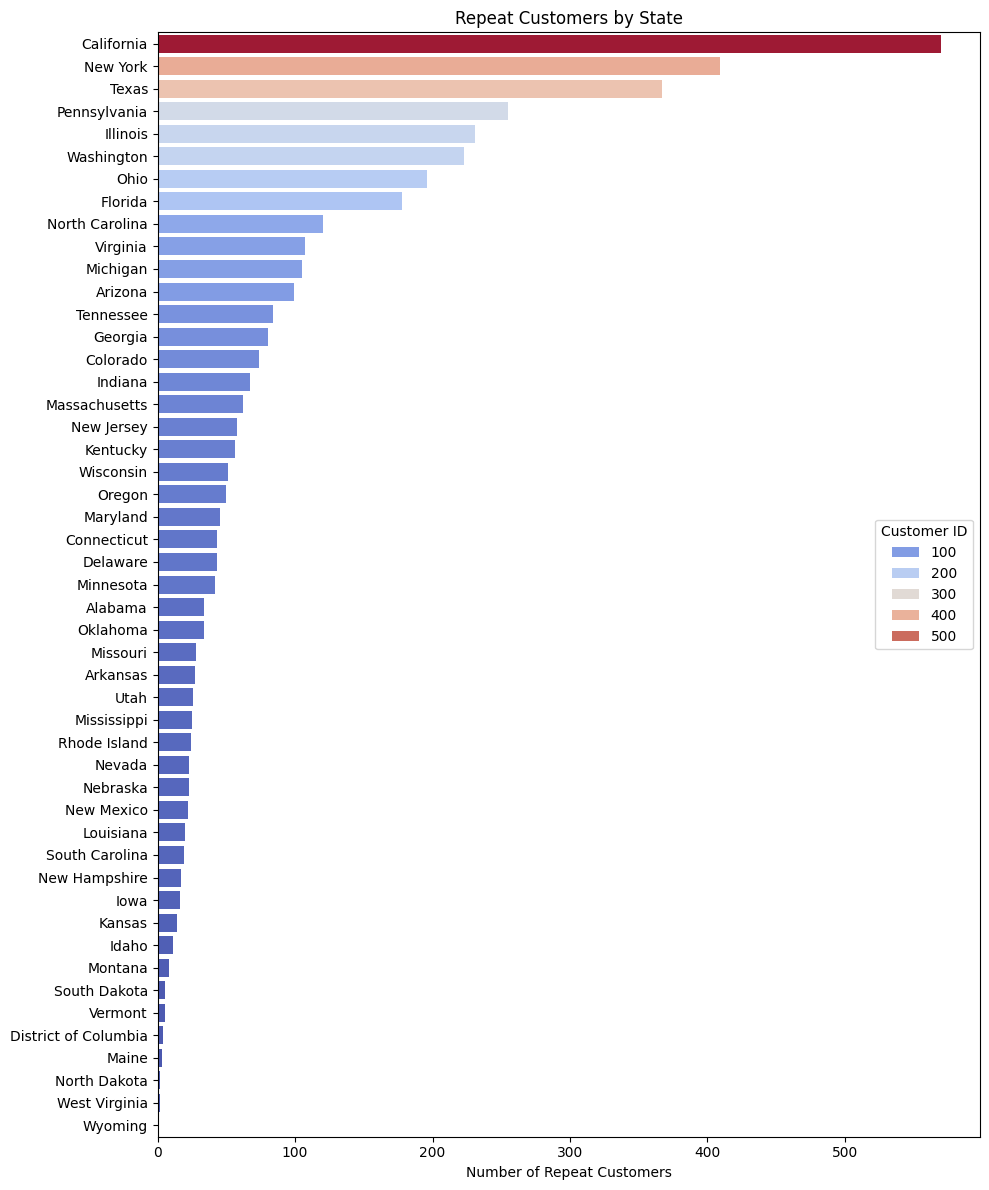

In [ ]:
# Aggregate repeat customers per state
repeat_customers_state = df.groupby("State")["Customer ID"].nunique().reset_index()
repeat_customers_state = repeat_customers_state.sort_values(by="Customer ID", ascending=False)

# Plot heatmap (bar chart)
plt.figure(figsize=(10, 12))
sns.barplot(y=repeat_customers_state["State"],
            x=repeat_customers_state["Customer ID"],
            hue=repeat_customers_state["Customer ID"],
            palette="coolwarm",
            legend=True)

sns.move_legend(plt.gca(), "center right")
plt.xlabel("Number of Repeat Customers")
plt.ylabel(None)
plt.title("Repeat Customers by State")
plt.tight_layout()
plt.show()

### **Repeat Purchase Analysis in the Superstore Dataset**  

To understand **repeat purchases**, we need to analyze how often customers place multiple orders, their purchasing behaviors across states, and the preferred product categories.

---

### **Customer Repeat Purchase by State**  
The plot shows the number of unique customers per state. However, to measure repeat purchases, we need to compare the number of **orders placed** against the number of **unique customers** in each state. A high number of orders per customer suggests a higher repeat purchase rate.

#### **Key Observations:**
- **California (570 customers), New York (409), and Texas (367)** have the highest number of unique customers.  
- States like **North Dakota (2), West Virginia (2), and Wyoming (1)** have very few customers, meaning limited repeat purchase data.  
- If we analyze **total orders per state** and divide by unique customers, we can estimate the **repeat purchase rate** per customer in each state.

#### **Actionable Insights:**
- **High-population states (California, New York, Texas, Pennsylvania, Illinois)** show a strong customer base.  
  - **Recommendation**: Offer **loyalty programs, targeted marketing, and email follow-ups** in these states to encourage more repeat purchases.  
- **Low customer states (e.g., North Dakota, West Virginia)** indicate a **low market presence**.  
  - **Recommendation**: Consider localized advertising or promotional offers to **increase market penetration** in these states.  

---


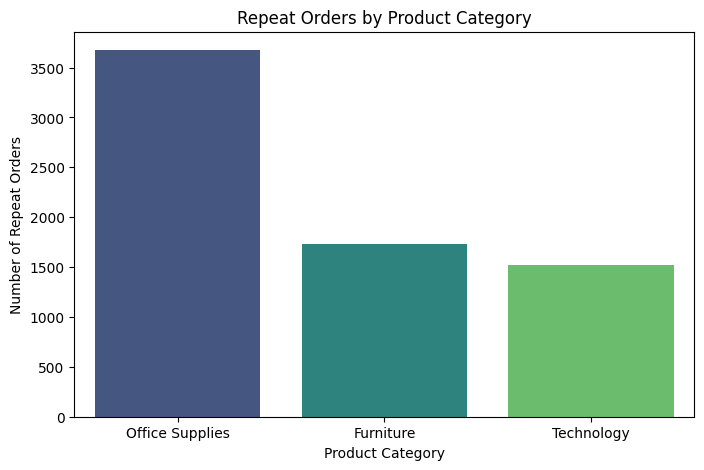

In [ ]:
# Aggregate repeat orders by product category
repeat_orders_category = df.groupby("Category")["Order ID"].nunique().reset_index()
repeat_orders_category = repeat_orders_category.sort_values(by="Order ID", ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=repeat_orders_category["Category"],
            y=repeat_orders_category["Order ID"],
            hue=repeat_orders_category["Category"],  # Explicitly set hue
            palette="viridis",
            legend=False)

plt.xlabel("Product Category")
plt.ylabel("Number of Repeat Orders")
plt.title("Repeat Orders by Product Category")
plt.show()


### **Repeat Purchases by Product Category**  
The second table summarizes the **number of unique orders per category**:  
- **Office Supplies (3,676 orders)**
- **Furniture (1,727 orders)**
- **Technology (1,519 orders)**  

Since "Order ID" is unique for each transaction, the **higher number of orders in a category indicates frequent purchases**.  

#### **Key Observations:**
- **Office Supplies** have the highest number of unique orders (3,676), suggesting **high repeat purchases.**  
  - Likely due to frequent reordering of consumables like paper, pens, and binders.  
- **Furniture orders (1,727) are lower**, likely because they are **one-time purchases** rather than recurring needs.  
- **Technology (1,519 orders) has the lowest repeat purchase rate**, possibly due to longer product lifecycles.  

#### **Actionable Insights:**
- **Encourage Office Supplies Repeat Purchases:**  
  - Offer **subscription-based services** (e.g., automatic replenishment for ink, paper).  
  - Provide **bulk discounts or bundle deals** to increase order frequency.  

- **Boost Furniture Repeat Sales:**  
  - Cross-sell related products (e.g., sell office chairs to customers who purchased desks).  
  - Introduce a **trade-in or upgrade program** for older furniture.  

- **Increase Technology Category Engagement:**  
  - Use **email marketing with personalized recommendations** (e.g., offer accessories for previously purchased tech products).  
  - Provide **extended warranty or tech support services** to keep customers engaged.  

---


### **Average Orders per Customer**

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")

avg_orders_per_customer = df.groupby("Customer ID")["Order ID"].nunique().mean()
print(f"Average Orders per Customer: {avg_orders_per_customer:.2f}")

Average Orders per Customer: 6.21


### **Customer Retention Rate (Customers who purchased in multiple years)**

In [ ]:
df["Order Year"] = df["Order Date"].dt.year
customer_years = df.groupby("Customer ID")["Order Year"].nunique()
retention_rate = (customer_years > 1).mean() * 100  # % of customers who bought in multiple years
print(f"Customer Retention Rate: {retention_rate:.2f} %")

Customer Retention Rate: 97.23 %


### **Average Time Between Purchases (Days)**

In [ ]:
def avg_time_between_orders(dates):
    dates = sorted(dates)  # Ensure the order is chronological
    if len(dates) < 2:
        return None  # No repeat purchase
    date_diffs = pd.Series(dates).diff().dropna().dt.days  # Calculate differences in days
    return date_diffs.mean()

customer_order_dates = df.groupby("Customer ID")["Order Date"].agg(list).apply(avg_time_between_orders)

avg_time_between_purchases = customer_order_dates.dropna().mean()
print(f"Average Time Between Purchases: {avg_time_between_purchases:.2f} days")

Average Time Between Purchases: 113.76 days


### **Analysis of Customer Purchasing Behavior**  

The results provide key insights into customer retention and purchasing frequency, which are critical for increasing profitability. Let’s break it down:

---

### **1. Average Orders per Customer: 6.21**  
✅ **What it Means:**  
- On average, each customer places **around 6 orders** over the dataset's four-year period.  
- This suggests a strong level of repeat business rather than one-time purchases.  
- The higher this number, the more loyal and engaged your customer base is.  

🔍 **Implications for Profit Growth:**  
- You already have a strong repeat purchase pattern, meaning customer acquisition efforts are paying off.  
- Focusing on **upselling and cross-selling** can further boost revenue per customer.  
- Segmenting customers based on their purchase frequency can help personalize marketing strategies.  

---

### **2. Customer Retention Rate: 97.23%**  
✅ **What it Means:**  
- A retention rate above **95%** is **exceptionally high**, indicating customers are highly satisfied and continue buying.  
- This is a strong competitive advantage since retaining existing customers is **cheaper** than acquiring new ones.  

🔍 **Implications for Profit Growth:**  
- Since retention is already high, focusing on **increasing order value** per purchase (e.g., bundling products or offering discounts for bulk purchases) can drive profits.  
- Consider implementing a **loyalty program** or targeted promotions to maintain engagement.  
- Investigate **which customer segments have the highest retention and why**—replicating their experience across other segments could further strengthen retention.  

---

### **3. Average Time Between Purchases: 113.76 Days (~3.7 months)**  
✅ **What it Means:**  
- Customers make a purchase every **3–4 months** on average.  
- This suggests that many customers buy only **a few times per year**, which may be due to the nature of the products sold (e.g., office supplies, furniture, technology).  

🔍 **Implications for Profit Growth:**  
- If 113.76 days is **too long**, strategies like:  
  - **Seasonal promotions** to encourage faster repurchasing.  
  - **Subscription models** for frequently bought items (e.g., office supplies).  
  - **Email reminders** with discounts for customers who haven’t purchased in 90 days.  
- If this aligns with industry norms, focus on **increasing the basket size per order** rather than reducing time between purchases.  

---

### **Recommendations for Growth:**  
✅ **Leverage High Retention:** Keep customers engaged with personalized discounts, loyalty rewards, or VIP programs.  
✅ **Reduce Purchase Cycle (if needed):** Use email marketing, reminders, and incentives to encourage faster repurchasing.  
✅ **Boost Order Value:** Offer product bundles, bulk discounts, or recommend complementary items.  
✅ **Segment Your Customers:** Identify who buys most frequently and tailor strategies to increase their spending.  


## Shipping Methods

In [ ]:
shipping_model = df["Ship Mode"].value_counts().reset_index().rename(columns={"Ship Mode": "Mode of Shipping"})
shipping_model

,Mode of Shipping,count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


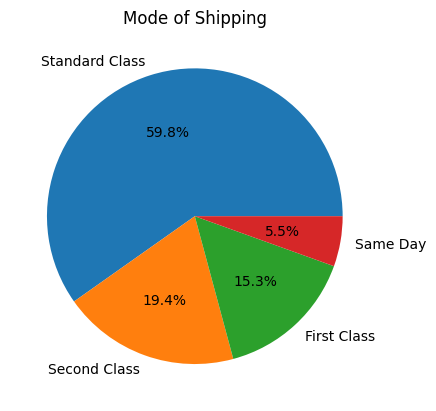

In [ ]:
plt.pie(shipping_model["count"], labels=shipping_model["Mode of Shipping"], autopct="%1.1f%%")
plt.title("Mode of Shipping")
plt.show()

### **Analysis of Shipping Methods and Actionable Insights**  

Shipping plays a crucial role in customer satisfaction and profitability. The breakdown of shipping modes provides insights into customer preferences, potential inefficiencies, and opportunities to optimize logistics costs.

---

### **1. Breakdown of Shipping Preferences**  
- **Standard Class:** 5,859 orders (**59.8%**)  
- **Second Class:** 1,902 orders (**19.4%**)  
- **First Class:** 1,501 orders (**15.3%**)  
- **Same Day:** 538 orders (**5.5%**)  

### **2. Key Observations**  

✅ **Standard Class is the dominant choice (59.8%)**  
- The majority of customers opt for **Standard Class**, likely due to its affordability.  
- This suggests that customers are generally **price-sensitive rather than speed-sensitive**.  

✅ **Expedited Shipping (First Class & Same Day) is used less (20.8%)**  
- **First Class (15.3%)** and **Same Day (5.5%)** have lower adoption, indicating that **only a small segment values speed over cost**.  
- However, these orders might be **high-margin purchases**, so optimizing these categories could boost profits.  

✅ **Second Class (19.4%) is a middle ground**  
- This option balances cost and speed, indicating that a portion of customers prefer faster shipping but don’t need premium options.  
- Investigating whether **Second Class offers a better trade-off in customer satisfaction vs. shipping costs** could be valuable.  

---

### **3. Actionable Insights for Profit Growth**  

📌 **1. Optimize Standard Class Logistics to Reduce Costs**  
- Since most orders use **Standard Class**, lowering its cost (e.g., through bulk shipping deals with logistics providers) could increase profit margins.  
- **Action:** Negotiate better shipping rates with carriers based on bulk volume.  

📌 **2. Promote Expedited Shipping for High-Value Customers**  
- Since **only 20.8% of customers choose First Class or Same Day**, they may be **willing to pay more** for fast service.  
- **Action:** Introduce **dynamic pricing for shipping** (e.g., free First Class for orders over a certain value).  

📌 **3. Experiment with Free Shipping Thresholds**  
- Offering **free First Class shipping for orders above a threshold ($100+)** can encourage higher spending.  
- **Action:** A/B test how free shipping thresholds impact average order value.  

📌 **4. Improve Shipping Transparency & Speed Without Extra Costs**  
- Customers may be **choosing slower shipping because they don’t trust expensive shipping benefits**.  
- **Action:** Offer **estimated delivery times at checkout** and test if better delivery tracking increases First Class/Same Day adoption.  

📌 **5. Analyze Shipping Mode by Region**  
- Some regions may rely more on **Standard Class due to lower urgency**, while urban customers may **prefer First Class/Same Day**.  
- **Action:** Segment shipping preferences by state/city to identify opportunities for faster shipping promotions in high-demand areas.  

---

### **Recommendation**  
💡 **Maximize profits by optimizing Standard Class costs, incentivizing faster shipping for high-value customers, and using free shipping thresholds to increase order value.**  


### Correlation of Shipping Mode with Customer Segments, Sales, and Product Categories
Analyzing how shipping preferences vary across customer segments, sales, and product categories can reveal patterns that impact profitability and customer behavior.

#### **Shipping Mode by Customer Segment**

In [ ]:
df.groupby(["Segment", "Ship Mode"])["Order ID"].nunique().unstack().apply(lambda x: x / x.sum(), axis=1)

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,0.153331,0.060702,0.192353,0.593615
Corporate,0.164319,0.038900,0.197854,0.598927
Home Office,0.154362,0.054810,0.180089,0.610738


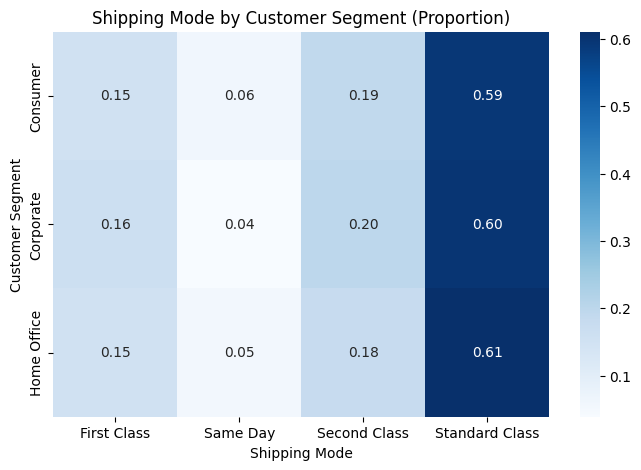

In [ ]:
shipping_segment = pd.DataFrame({
    "Segment": ["Consumer", "Corporate", "Home Office"],
    "First Class": [0.153331, 0.164319, 0.154362],
    "Same Day": [0.060702, 0.038900, 0.054810],
    "Second Class": [0.192353, 0.197854, 0.180089],
    "Standard Class": [0.593615, 0.598927, 0.610738]
}).set_index("Segment")

plt.figure(figsize=(8, 5))
sns.heatmap(shipping_segment, annot=True, cmap="Blues", fmt=".2f")
plt.title("Shipping Mode by Customer Segment (Proportion)")
plt.xlabel("Shipping Mode")
plt.ylabel("Customer Segment")
plt.show()

**Shipping Mode by Customer Segment**  

✅ **Consumers and Corporate customers** have very similar shipping preferences, with nearly **60% choosing Standard Class**, while Home Office customers use it even more at **61%**.  
✅ **First Class shipping is slightly more popular among Corporate customers (16.4%)** compared to Consumers (15.3%) and Home Office users (15.4%).  
✅ **Same Day shipping is used more by Consumers (6.1%) and Home Office users (5.5%)** than Corporate customers (3.9%).  

**📌 Actionable Insights:**  
🚀 **For Corporate customers:**  
- Offer **discounts or priority support** for First Class shipping, as they may value reliability over cost.  

🚀 **For Home Office customers:**  
- Since they use Standard Class the most, provide **subscription-based discounted shipping** to encourage repeat purchases.  

🚀 **For Consumers:**  
- Consumers use more Same Day shipping than Corporate customers. Running **"limited-time Same Day shipping promotions"** could increase urgency-driven purchases.  

---


#### **Shipping Mode by Sales Value**

In [ ]:
df.groupby("Ship Mode")["Sales"].mean().sort_values(ascending=False)

,Sales
Ship Mode,
Second Class,236.547939
Same Day,232.749143
First Class,230.228020
Standard Class,228.849856


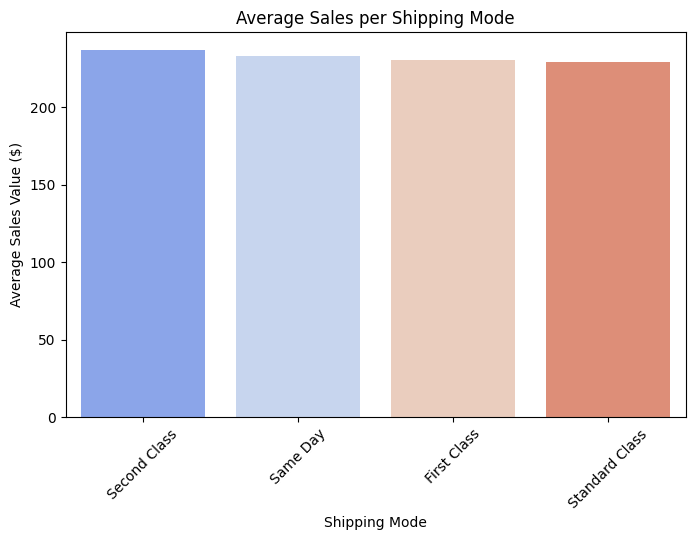

In [ ]:
shipping_sales = pd.DataFrame({
    "Ship Mode": ["Second Class", "Same Day", "First Class", "Standard Class"],
    "Sales": [236.547939, 232.749143, 230.228020, 228.849856]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=shipping_sales, x="Ship Mode", y="Sales", hue='Ship Mode', palette="coolwarm")
plt.title("Average Sales per Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Average Sales Value ($)")
plt.xticks(rotation=45)
plt.show()

**Shipping Mode by Sales Value**  

✅ Orders using Second Class shipping have the highest average sales ($236.55), followed by Same Day ($232.75) and First Class ($230.23).  

✅ Standard Class orders have the lowest average sales ($228.85).  

**📌 Actionable Insights:**  
🚀 **Premium Shipping Upsells:**  
- Since customers using **Second Class shipping tend to spend the most**, consider offering an **"Upgrade to First Class for just $X"** option at checkout.  

🚀 **Dynamic Shipping Discounts:**  
- Introduce **free Same Day shipping for orders over $250** to encourage higher spending.  

🚀 **Standard Class Revenue Optimization:**  
- Customers using Standard Class spend the least—consider bundling **"Express Shipping for a Small Additional Fee"** to increase revenue per transaction.  

---



#### **Shipping Mode by Product Category**

In [ ]:
df.groupby(["Category", "Ship Mode"])["Order ID"].nunique().unstack().apply(lambda x: x / x.sum(), axis=1)

Ship Mode,First Class,Same Day,Second Class,Standard Class
Category,,,,
Furniture,0.155182,0.055009,0.198031,0.591778
Office Supplies,0.156148,0.052775,0.189336,0.601741
Technology,0.161949,0.051350,0.200790,0.585912


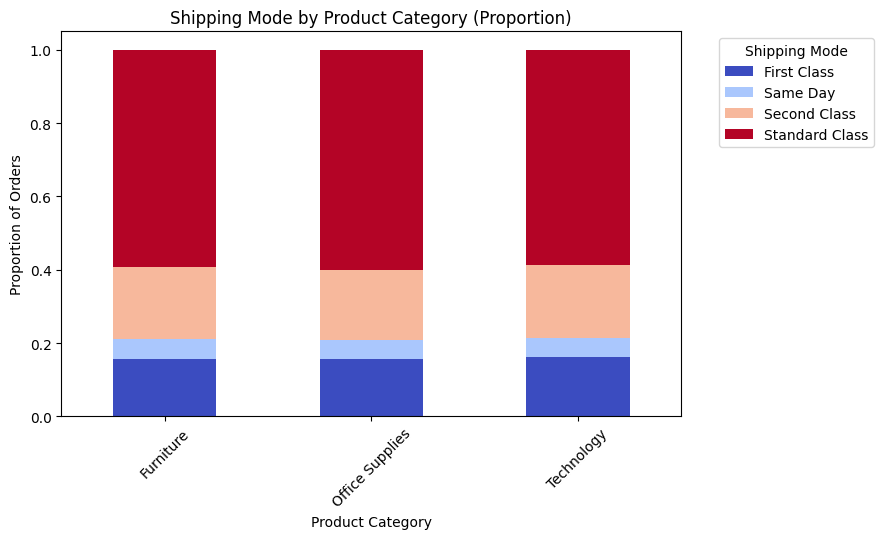

In [ ]:
shipping_category = pd.DataFrame({
    "Category": ["Furniture", "Office Supplies", "Technology"],
    "First Class": [0.155182, 0.156148, 0.161949],
    "Same Day": [0.055009, 0.052775, 0.051350],
    "Second Class": [0.198031, 0.189336, 0.200790],
    "Standard Class": [0.591778, 0.601741, 0.585912]
}).set_index("Category")

shipping_category.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Shipping Mode by Product Category (Proportion)")
plt.xlabel("Product Category")
plt.ylabel("Proportion of Orders")
plt.xticks(rotation=45)
# Move legend outside
plt.legend(title="Shipping Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Shipping Mode by Product Category**  

✅ **Technology products have the highest share of First Class (16.2%) and Second Class (20.1%) shipping.**  
✅ **Office Supplies and Furniture both rely on Standard Class for over 59% of their shipments.**  
✅ **Same Day shipping is least common across all categories but is slightly higher for Furniture (5.5%).**  

**📌 Actionable Insights:**  
🚀 **Expedited Shipping for Technology Products:**  
- Since **Technology customers opt for faster shipping more frequently**, offer **free First Class shipping on high-ticket items** or limited-time Same Day deals.  

🚀 **Bulk Shipping Incentives for Office Supplies & Furniture:**  
- Standard Class dominates these categories. Offer **"Buy More, Ship Faster"** incentives to **move customers toward faster shipping.**  
- For Furniture, introduce **pre-scheduled delivery slots** to enhance convenience and satisfaction.  

🚀 **Same Day Shipping as a Premium Service:**  
- Same Day usage is low overall. Introduce **premium memberships** where customers can access unlimited Same Day shipping for an annual fee.  


### **Strategic Recommendations**  
📌 **Optimize Shipping for High-Spenders:** Encourage Second Class users (who spend the most) to upgrade to First Class.  
📌 **Target Home Office Users with Subscription Shipping Discounts:** Since they use Standard Class the most, offer a "Prime-style" shipping membership.  
📌 **Leverage Urgency in Tech Products:** Promote fast shipping incentives on high-value electronics.  
📌 **Introduce Bulk Shipping for Office & Furniture:** Reduce reliance on Standard Class by offering bundle deals with faster shipping options.  

## Sales

In [ ]:
state = df["State"].value_counts().reset_index()
state.head()

,State,count
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504


In [ ]:
state_sales = df.groupby("State")["Sales"] \
                .sum() \
                .reset_index() \
                .sort_values(by="Sales", ascending=False)

state_sales

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


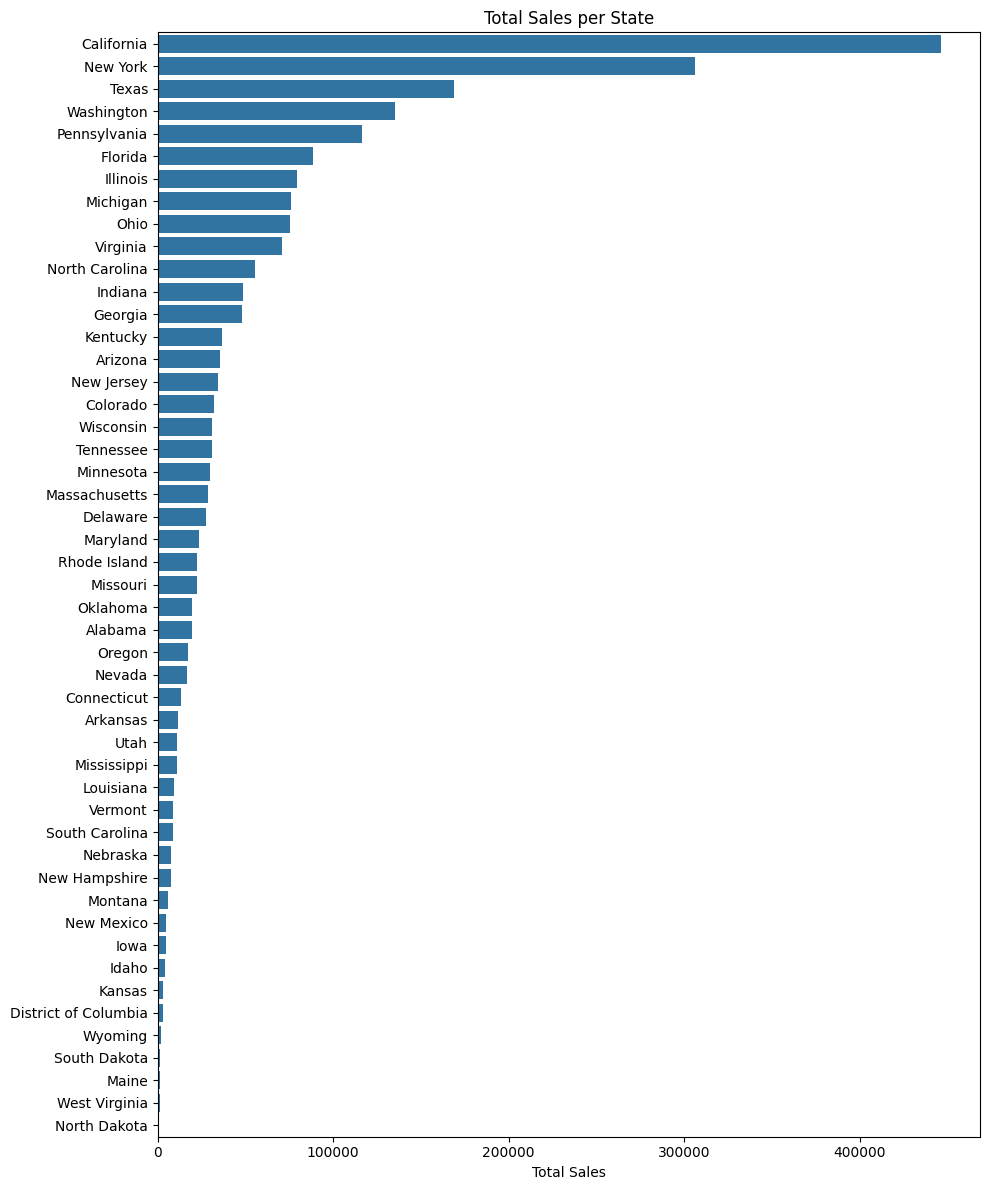

In [ ]:
plt.figure(figsize=(10, 12))
ax = sns.barplot(x="Sales", y="State", data=state_sales, errorbar=None)
plt.xlabel("Total Sales")
plt.ylabel(None)
plt.title("Total Sales per State")
plt.tight_layout()
plt.show()



### **State-Level Sales Performance**  
- **Top-Performing States:**  
  - **California** leads significantly with **$446K+** in sales, followed by **New York ($306K+)** and **Texas ($168K+).**  
  
  - These three states together contribute a substantial share of total revenue.  
- **Mid-Tier Performers:**  
  - States like **Florida, Illinois, Michigan, and Ohio** show moderate sales, ranging from **$75K to $88K.**  
- **Lowest Sales Contributors:**  
  - **North Dakota ($919), West Virginia ($1.2K), Maine ($1.2K), and South Dakota ($1.3K)** generate the least revenue, indicating potential market expansion opportunities.  


In [ ]:
city_sales = df.groupby("City")["Sales"] \
                .sum() \
                .reset_index() \
                .sort_values(by="Sales", ascending=False)

city_sales

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749
...,...,...
352,Ormond Beach,2.808
368,Pensacola,2.214
221,Jupiter,2.064
140,Elyria,1.824


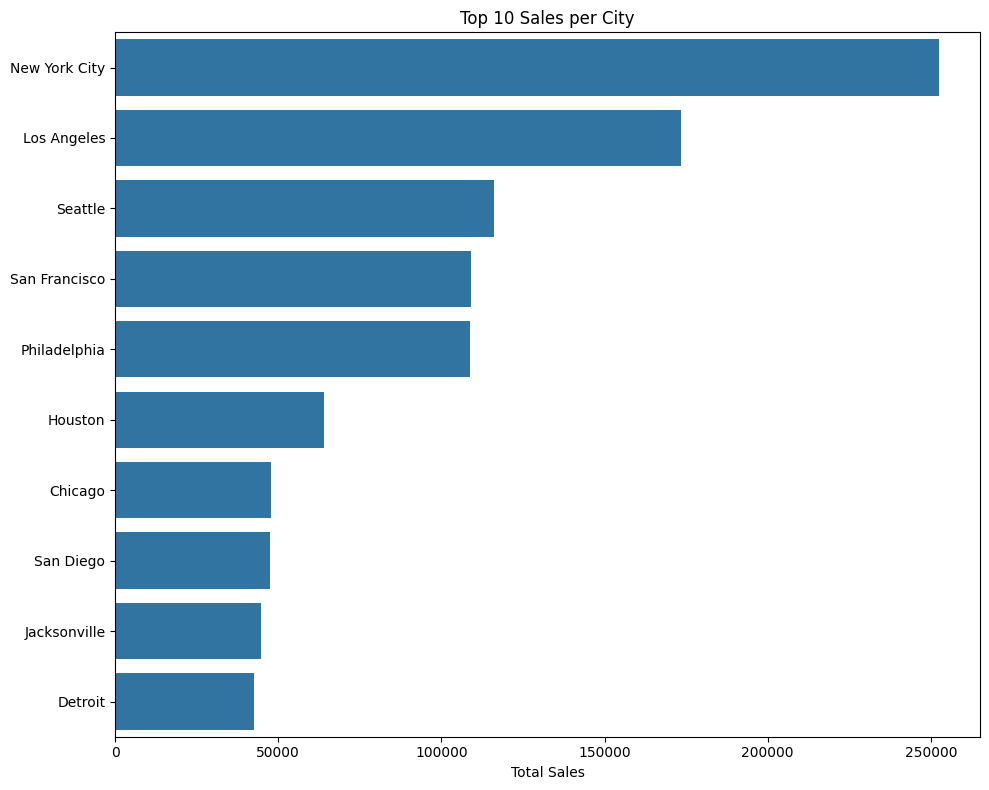

In [ ]:
city_sales = city_sales.head(10)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Sales", y="City", data=city_sales, errorbar=None)
plt.xlabel("Total Sales")
plt.ylabel(None)
plt.title("Top 10 Sales per City")
plt.tight_layout()
plt.show()

### **City-Level Sales Performance**  
- **Top Cities:**  
  - **New York City ($252K), Los Angeles ($173K), Seattle ($116K), and San Francisco ($109K)** are the highest revenue-generating cities.  
  - This suggests that urban markets contribute significantly to total sales.  
- **Bottom Cities:**  
  - Cities like **Abilene ($1.4), Elyria ($1.8), and Jupiter ($2.0)** contribute minimally. These areas may either have low demand or face distribution challenges.  

### **Actionable Insights 🚀**  
✔️ **Strengthen marketing and promotions** in high-revenue states (CA, NY, TX) to maximize existing customer bases.  
✔️ **Investigate market penetration strategies** for low-performing states to drive sales (e.g., localized marketing, discounts).  
✔️ **Leverage urban dominance** by expanding offerings and exclusive deals in top cities like NYC, LA, and Seattle.  
✔️ **Analyze logistics challenges** in low-sales cities and states to identify potential barriers like shipping constraints or low awareness.  


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"] \
                .sum() \
                .reset_index() \
                .rename(columns={"Order Date": "Year"})

yearly_sales

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


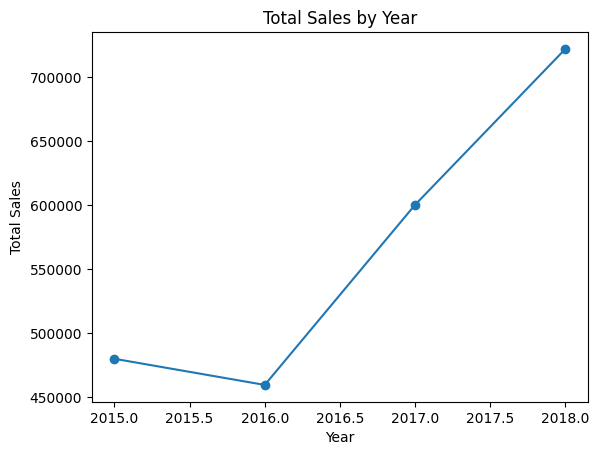

In [ ]:
plt.plot(yearly_sales["Year"], yearly_sales["Sales"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Year")
plt.show()

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df_2018 = df[df["Order Date"].dt.year == 2018]
df_2018 = df_2018.set_index("Order Date")
# Resample quarterly sales
quarterly_sales = df_2018["Sales"].resample("QE").sum().reset_index()
quarterly_sales = quarterly_sales.rename(columns={"Sales": "Quarterly Sales"})
quarterly_sales

,Order Date,Quarterly Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


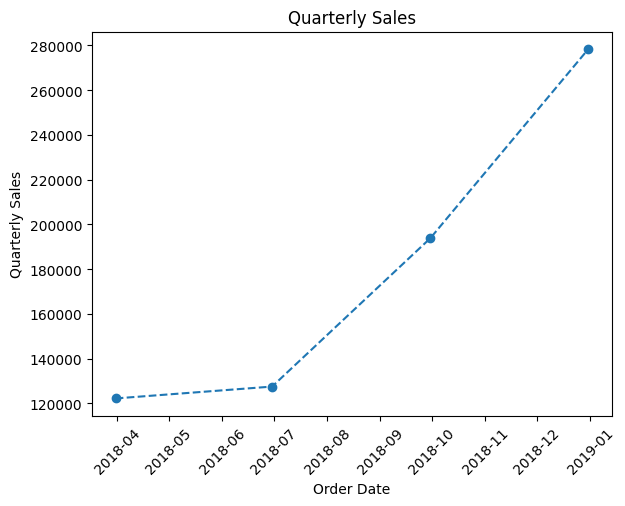

In [ ]:
plt.plot(quarterly_sales["Order Date"], quarterly_sales["Quarterly Sales"], marker="o", linestyle="--")
plt.xlabel("Order Date")
plt.ylabel("Quarterly Sales")
plt.title("Quarterly Sales")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df_2018 = df[df["Order Date"].dt.year == 2018]
df_2018 = df_2018.set_index("Order Date")
# Resample monthly sales
monthly_sales = df_2018["Sales"].resample("ME").sum().reset_index()
monthly_sales = monthly_sales.rename(columns={"Sales": "Monthly Sales"})
monthly_sales

,Order Date,Monthly Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


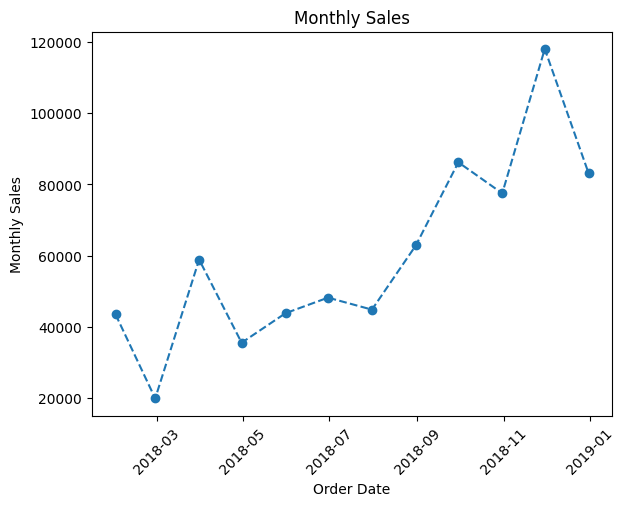

In [ ]:
plt.plot(monthly_sales["Order Date"], monthly_sales["Monthly Sales"], marker="o", linestyle="--")
plt.xlabel("Order Date")
plt.ylabel("Monthly Sales")
plt.title("Monthly Sales")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### **Sales Trends Over Time (Yearly, Quarterly, Monthly)**

#### **1. Yearly Sales Performance**
| Year  | Total Sales ($) |
|-------|---------------|
| **2015** | **479,856.21** |
| **2016** | **459,436.01** |
| **2017** | **600,192.55** |
| **2018** | **722,052.02** |

📈 **Key Insights**  
✅ **Steady growth from 2016 to 2018**: A significant increase of **31% from 2016 to 2017** and **20% from 2017 to 2018**.  
✅ **2016 saw a slight dip** compared to 2015, possibly due to market fluctuations or seasonality.

---

#### **2. Quarterly Sales in 2018**
| Quarter | Sales ($) |
|---------|-----------|
| **Q1 (Jan-Mar)** | **122,260.88** |
| **Q2 (Apr-Jun)** | **127,558.62** |
| **Q3 (Jul-Sep)** | **193,815.84** |
| **Q4 (Oct-Dec)** | **278,416.68** |

📊 **Key Insights**  
✅ **Q4 is the strongest quarter**, with sales almost **2.3× higher than Q1**, likely due to holiday shopping (Black Friday, Christmas).  
✅ **Q3 also shows a significant increase**, suggesting back-to-school or end-of-Q3 budget spending.  
✅ **Q1 and Q2 are relatively stable but lower compared to Q3 and Q4.**

---

#### **3. Monthly Sales in 2018**
| Month | Sales ($) |
|--------|-----------|
| **Jan** | **43,476.47** |
| **Feb** | **19,920.99** |
| **Mar** | **58,863.41** |
| **Apr** | **35,541.91** |
| **May** | **43,825.98** |
| **Jun** | **48,190.73** |
| **Jul** | **44,825.10** |
| **Aug** | **62,837.85** |
| **Sep** | **86,152.89** |
| **Oct** | **77,448.13** |
| **Nov** | **117,938.16** |
| **Dec** | **83,030.39** |

📆 **Key Insights**  
✅ **November dominates**, likely due to **Black Friday and holiday promotions**.  
✅ **September and August show an increase**, possibly due to **back-to-school spending**.  
✅ **February is the weakest month**, possibly due to **post-holiday slowdowns**.  
✅ **December, despite holidays, is lower than November**, suggesting **peak spending happens before December.**  

---

### **Business Strategy Suggestions**
1️⃣ **Leverage seasonality for targeted marketing**  
   - Increase ad spend in **Q3 and Q4**, especially August, September, and November.  
   - Offer incentives or early promotions in **January and February** to boost low sales months.  

2️⃣ **Analyze product-level seasonality**  
   - Do some product categories perform better in specific months?  
   - Consider running discount campaigns for slow-moving items in Q1/Q2.  

3️⃣ **Investigate Q1 sales drop in 2016**  
   - Compare order volume vs. ASP to understand if the decrease was due to fewer transactions or lower prices.  

---


## Products

In [ ]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
sub_category_count = df.groupby("Category")["Sub-Category"] \
                    .count() \
                    .reset_index() \
                    .sort_values(by="Sub-Category", ascending=False)

sub_category_count

,Category,Sub-Category
1,Office Supplies,5909
0,Furniture,2078
2,Technology,1813


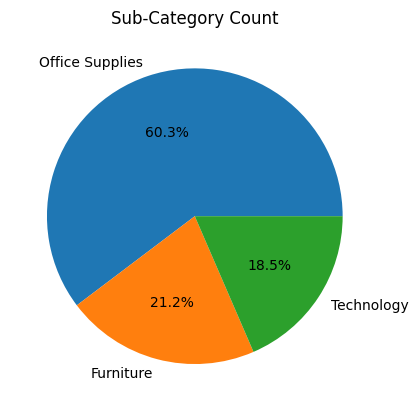

In [ ]:
plt.pie(sub_category_count["Sub-Category"], labels=sub_category_count["Category"], autopct="%1.1f%%")
plt.title("Sub-Category Count")
plt.show()

In [ ]:
sub_category_sales = df.groupby(["Category", "Sub-Category"])["Sales"] \
                    .sum() \
                    .reset_index() \
                    .sort_values(by="Sales", ascending=False)

sub_category_sales

,Category,Sub-Category,Sales
16,Technology,Phones,327782.4480
1,Furniture,Chairs,322822.7310
11,Office Supplies,Storage,219343.3920
3,Furniture,Tables,202810.6280
6,Office Supplies,Binders,200028.7850
15,Technology,Machines,189238.6310
13,Technology,Accessories,164186.7000
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,113813.1987
4,Office Supplies,Appliances,104618.4030


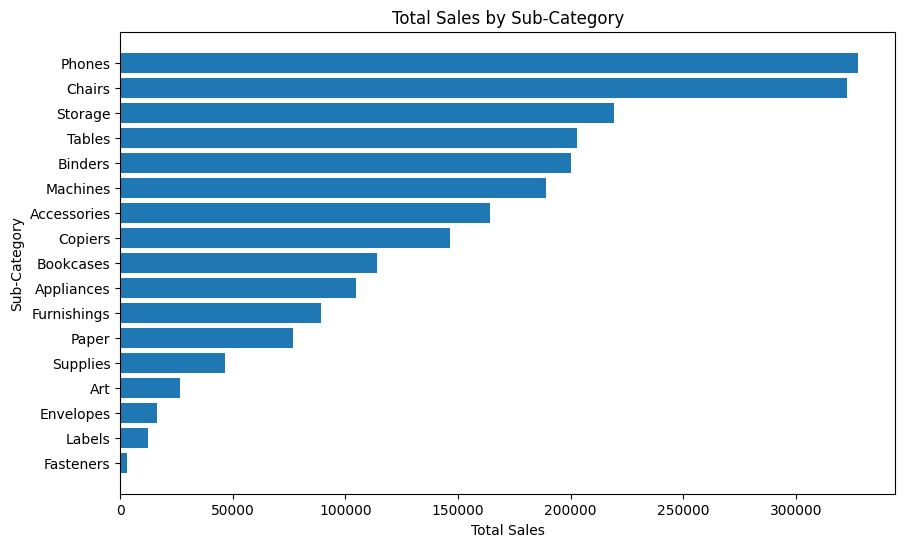

In [ ]:
plt.figure(figsize=(10, 6))
sub_category_count_sales = sub_category_sales.sort_values(by="Sales", ascending=True)
plt.barh(sub_category_count_sales["Sub-Category"], sub_category_count_sales["Sales"])
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.title("Total Sales by Sub-Category")
plt.show()

### **Product Category & Subcategory Analysis: Impact on Business**

#### **1. Key Observations from Category & Subcategory Distribution**
- **Office Supplies** is the largest category by volume (60.3% of total sales transactions), followed by **Furniture** (21.2%) and **Technology** (18.5%).
- While Office Supplies has the highest number of transactions, **Technology and Furniture generate higher revenue per transaction**, suggesting that these categories involve higher-priced items.

#### **2. Sales Performance by Subcategory**
- **Top Revenue-Generating Subcategories**:
  - 📱 **Phones** (Technology) – **$327,782.45**

  - 🪑 **Chairs** (Furniture) – **$322,822.73**

  - 📦 **Storage** (Office Supplies) – **$219,343.39**

  - 🏢 **Tables** (Furniture) – **$202,810.63**

  - 📂 **Binders** (Office Supplies) – **$200,028.78**

- **Low-Performing Subcategories**:
  - 📌 **Fasteners** – **$3,001.96** (Office Supplies)

  - 🏷️ **Labels** – **$12,347.73** (Office Supplies)
  
  - ✉️ **Envelopes** – **$16,128.05** (Office Supplies)

#### **3. Actionable Insights**
1. **Expand High-Performing Subcategories**
   - **Phones, Chairs, and Storage drive significant revenue**, suggesting a strong market demand.
   - Consider investing in **promotional campaigns or bundling strategies** for these items to further maximize revenue.

2. **Optimize Inventory for Office Supplies**
   - While Office Supplies dominate transactions, revenue is **significantly lower** for certain subcategories.
   - **Reduce stock or discount low-performing items** like **Fasteners, Labels, and Envelopes** to optimize storage and cash flow.

3. **Leverage Cross-Selling Strategies**
   - **Phones & Accessories:** Customers purchasing phones may also be interested in **headsets, chargers, or cases**.
   - **Chairs & Tables:** Offer bundled discounts on **office furniture sets**.
   - **Storage & Binders:** Suggest bundling **office organization products** to increase transaction value.

4. **Category-Specific Marketing**
   - **Technology & Furniture** could benefit from **targeted advertising** emphasizing quality and durability.
   - **Office Supplies** may need a **higher volume sales approach** (bulk discounts, subscriptions).


### Best-performing categories in terms of revenue

In [ ]:
category_sales = df.groupby("Category")["Sales"] \
                    .sum() \
                    .reset_index() \
                    .sort_values(by="Sales", ascending=False)
category_sales

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


**Best-Performing Categories by Revenue**
🔹 **Technology leads in revenue**, likely due to high-ticket items like **Phones, Machines, and Copiers**.  
🔹 **Furniture is a close second**, indicating a strong demand for Chairs and Tables.  
🔹 **Office Supplies, while third, still generates significant sales**, showing steady demand for Binders, Storage, and Appliances.  

---


### Average Selling Price (ASP)

In [ ]:
asp_per_subcategory = df.groupby(["Category", "Sub-Category"])["Sales"].sum() / \
                      df.groupby(["Category", "Sub-Category"])["Order ID"].nunique()
asp_per_subcategory = asp_per_subcategory.reset_index().rename(columns={0: "ASP"}).sort_values
asp_per_subcategory

,Category,Sub-Category,ASP
14,Technology,Copiers,2215.880212
15,Technology,Machines,1689.630634
3,Furniture,Tables,671.558371
1,Furniture,Chairs,570.358182
0,Furniture,Bookcases,512.672066
16,Technology,Phones,408.197320
11,Office Supplies,Storage,287.098681
12,Office Supplies,Supplies,256.465790
4,Office Supplies,Appliances,235.627034
13,Technology,Accessories,233.884188


**Average Selling Price (ASP) by Sub-Category**

🔹 **Copiers and Machines have the highest ASP, contributing to Technology’s revenue dominance.**  
🔹 **Furniture (Tables, Chairs, Bookcases) has relatively high ASP but requires large orders for high revenue.**  
🔹 **Office Supplies (ASP mostly below $300) relies on volume sales rather than premium pricing.**  

---


### **Potential Business Strategies**
1️⃣ **Increase focus on high-ASP products**  
   - Promote **Copiers, Machines, and Phones** in **Technology**.  
   - Boost **Furniture sales** by bundling **Tables, Chairs, and Bookcases** in corporate packages.  

2️⃣ **Explore pricing strategies for Office Supplies**  
   - Since ASP is low, consider volume discounts to increase large bulk orders.  

3️⃣ **Geographical Analysis Next?**  
   - Break this down by **State or City** to identify high-revenue regions.

### Nested pie chart (sunburst) and treemap to vizualize in detail categories and sub-categories

In [ ]:
import plotly.express as px

df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
    title='Sales by Category and Sub-Category'
)

fig.update_layout(
    width=1000,  # Increase width (default is ~700)
    height=750,  # Increase height (default is ~450)
    title_font_size=20
)

fig.show()

In [ ]:
df_summary2 = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

fig = px.treemap(
    df_summary2,
    path=['Category', 'Ship Mode', "Sub-Category"],
    values='Sales',
    title='Sales by Category and Sub-Category'
)

fig.update_layout(
    width=1000,  # Increase width (default is ~700)
    height=750,  # Increase height (default is ~450)
    title_font_size=20
)

fig.show()

## Map all 50 States

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Mapping for all 50 States
all_states_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

In [ ]:
# Add abbreviation column to the DataFrame
df["Abbreviation"] = df["State"].map(all_states_mapping)
sum_of_sales_per_state = df.groupby("State")["Sales"].sum().reset_index()
# Add Abbreviation to sum_of_sales_per_state
sum_of_sales_per_state["Abbreviation"] = sum_of_sales_per_state["State"].map(all_states_mapping)

fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales_per_state["Abbreviation"],
    locationmode="USA-states",
    z=sum_of_sales_per_state["Sales"],
    hoverinfo="location+z",
    showscale=True
))

In [ ]:
fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope="usa",
    title="Total Sales per State"
)
fig.show()

## Detailed Sales Distribution

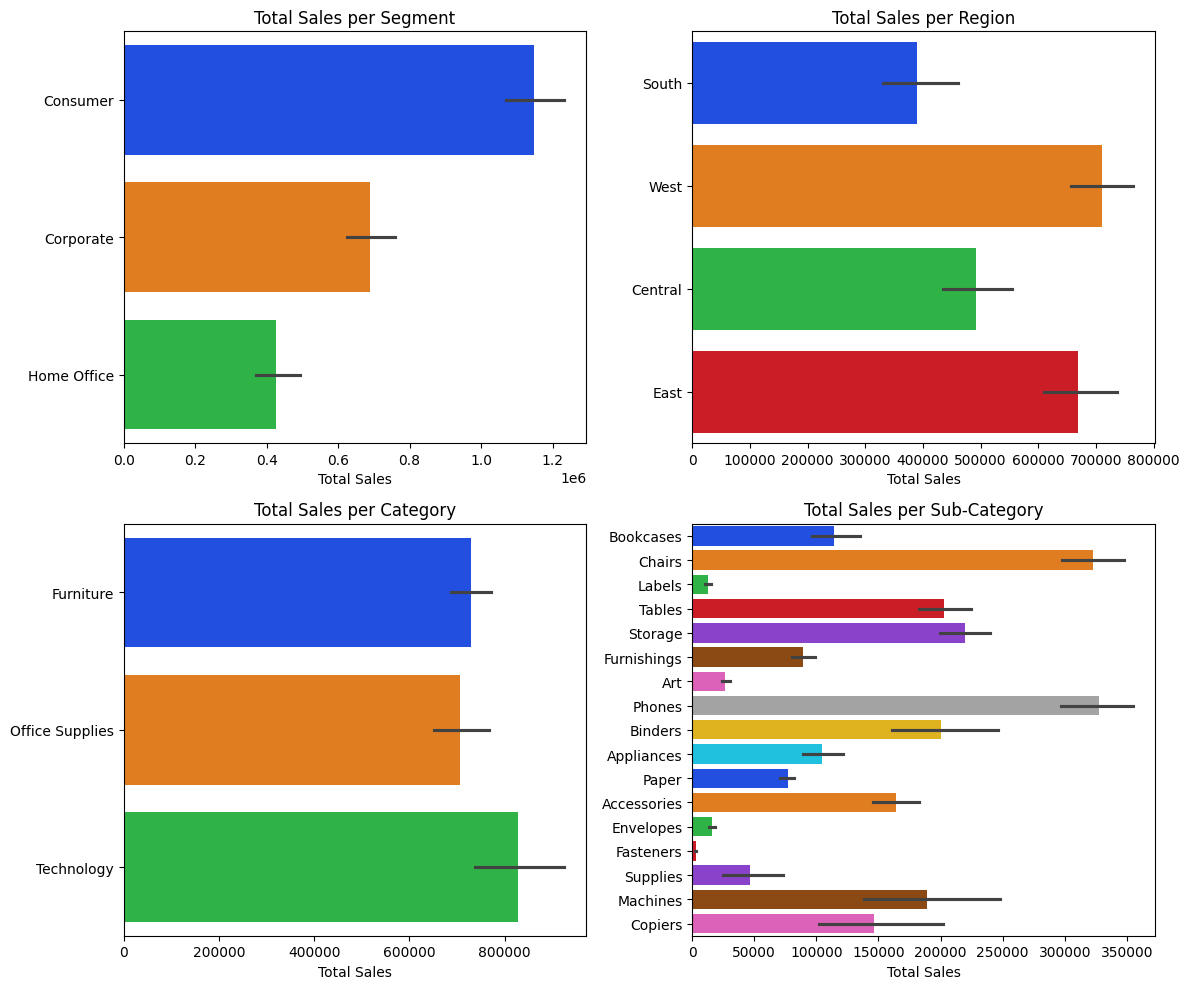

In [ ]:
fig = plt.figure(figsize=(12, 10))
axes = fig.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)

columns = ["Segment", "Region", "Category", "Sub-Category"]

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x="Sales", y=column, data=df, estimator=np.sum, palette="bright", ax=ax, hue=column)
    ax.set_xlabel("Total Sales")
    ax.set_ylabel(None)
    ax.set_title(f"Total Sales per {column}")

plt.tight_layout()
plt.show()

### **Analysis of Sales Distribution by Segment, Region, Category, and Sub-Category**

The visualizations give a comprehensive view of how sales are distributed across **customer segments, geographic regions, product categories, and sub-categories.** Below is a **detailed breakdown** of key observations, patterns, and actionable business insights.

---

### **1. Sales Distribution by Customer Segment**
**Observations:**
- **Consumer segment dominates sales**, generating the highest revenue.
- **Corporate segment follows**, with a considerable but notably lower sales volume.
- **Home Office segment has the lowest sales**, significantly trailing the other two.

**Actionable Insights:**
✅ **Leverage Consumer segment growth**  
   - This segment is the main driver of revenue, so **targeted marketing campaigns, personalized promotions, and loyalty programs** can help further boost sales.  
   - Invest in **enhancing the online shopping experience**, since consumers often shop online.  

✅ **Optimize pricing and offerings for the Corporate segment**  
   - Businesses might prefer **bulk purchases or contractual deals**. Offering corporate discounts, B2B loyalty programs, or subscription-based pricing can **increase sales volume**.  

✅ **Reassess strategies for the Home Office segment**  
   - A small yet valuable niche; consider **bundling home office products** (e.g., desks, chairs, and accessories) and offering exclusive promotions for remote workers.  
   - Conduct surveys to understand why sales are low and **adapt product offerings accordingly**.  

---

### **2. Sales Performance by Region**
**Observations:**
- **East and West regions generate the highest sales**, with the East region leading.
- **Central and South regions show lower total sales**, indicating less penetration.

**Actionable Insights:**
✅ **Expand in high-performing regions (East & West)**  
   - Double down on advertising, promotions, and **inventory optimization** to cater to demand.  
   - Identify the best-selling products per region and ensure **local warehouses** are stocked accordingly.  

✅ **Boost penetration in Central and South regions**  
   - Investigate factors affecting sales: **distribution issues, weaker brand awareness, or lack of targeted marketing**.  
   - **Offer region-specific discounts or promotions** to encourage sales.  
   - **Strengthen delivery logistics** in these regions if shipping delays or stock availability are an issue.  

---

### **3. Sales Performance by Product Category**
**Observations:**
- **Technology is the highest-performing category**, followed by Furniture and Office Supplies.
- **Technology shows a significant lead**, indicating a strong demand for tech-related products.

**Actionable Insights:**
✅ **Capitalize on the strong demand for Technology**  
   - **Expand product variety** and introduce more high-margin items like **smart devices, accessories, or premium technology solutions**.  
   - Consider offering **bundled deals** (e.g., laptop + accessories package).  
   - Use **targeted advertising for tech buyers** (e.g., students, professionals, and corporate clients).  

✅ **Optimize pricing for Furniture and Office Supplies**  
   - Since these categories lag behind Technology, evaluate **pricing strategies, discount campaigns, and seasonal promotions**.  
   - **Target corporate clients** with bulk discounts on office furniture.  
   - **Analyze customer reviews** to identify improvement areas in furniture designs or features.  

---

### **4. Sales by Sub-Category**
**Observations:**
- **Copiers, Machines, and Tables** have the highest ASP and revenue contribution.
- **Labels, Fasteners, and Art Supplies** contribute the least in terms of revenue.
- **Phones, Binders, and Accessories are strong mid-range performers**.

**Actionable Insights:**
✅ **Maximize sales of high-performing sub-categories**  
   - Since **Copiers and Machines have a high ASP**, emphasize **premium branding, extended warranties, and financing options** to drive sales.  
   - **For high-ticket items, offer flexible payment plans** to encourage corporate and institutional purchases.  

✅ **Reposition low-performing sub-categories**  
   - Items like **Labels, Fasteners, and Art Supplies** have low revenue contribution, so consider:  
     - **Bundling them with complementary products** (e.g., fasteners with binders).  
     - **Discounting bulk orders** for corporate clients.  
     - **Phasing out slow-moving items** if they consistently underperform.  

✅ **Monitor mid-range categories for potential growth**  
   - **Phones, Binders, and Accessories** have stable demand but could be further optimized.  
   - **Upsell accessories** with tech-related purchases (e.g., pairing phone sales with cases and chargers).  

---

### **🔎 Final Business Strategy Recommendations**
🚀 **1. Boost Consumer and Corporate Segment Sales**  
   - **Personalized discounts, loyalty programs, and targeted email marketing** can enhance engagement.  

📍 **2. Strengthen Presence in Underperforming Regions**  
   - Focus on **logistics, localized advertising, and regional promotions** for the South and Central areas.  

💡 **3. Prioritize High-Margin Technology Sales**  
   - **Expand premium offerings, emphasize financing options, and target corporate buyers**.  

📦 **4. Revamp Low-Performing Sub-Categories**  
   - **Bundle slow-moving items with popular products or adjust pricing strategies** to improve sales.  
